## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

In [2]:
df = pd.read_csv('dataset\movie_clean.csv')

In [3]:
df.head(3)

,user_id,event_id,transaction_date,event_type,organization_type,event_category,user_type,user_location,gender,age_when_register,price,total_ticket_sold
0,50bd7b56b494e843cf8cc86deba1746b5dcb3622871c3c...,3757175fd0193ff5f0610a51c0c66bc2f23a027c76b0f7...,2019-01-01 05:51:06,Movie,Cinemas,Movies or Cinemas,Registered,Bandung,female,17.0,50000,3
1,5ab517007fc2fa2256ccb5179cf2f85fb6333c0b97e78f...,ce3ef49344353815e0e6bb9be1e94cae9e3dcf19e21931...,2019-01-03 06:24:18,Movie,Cinemas,Movies or Cinemas,Registered,Depok,female,21.0,35000,2
2,b9c12d8ea302adcf5c1583367702dfeff02c00bb3a247b...,b8e87ba403345ef34659cfce029a68f73ec6f89eee59e2...,2019-01-03 07:55:14,Movie,Cinemas,Movies or Cinemas,Registered,Jakarta,male,25.0,50000,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15138 entries, 0 to 15137
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            15138 non-null  object 
 1   event_id           15138 non-null  object 
 2   transaction_date   15138 non-null  object 
 3   event_type         15138 non-null  object 
 4   organization_type  15138 non-null  object 
 5   event_category     15138 non-null  object 
 6   user_type          15138 non-null  object 
 7   user_location      15138 non-null  object 
 8   gender             15138 non-null  object 
 9   age_when_register  15138 non-null  float64
 10  price              15138 non-null  int64  
 11  total_ticket_sold  15138 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1.4+ MB


In [5]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,user_id,object,0,0.0,5038,[a8492c6637361bec4513b80d6df832986307c902e8f70...
1,event_id,object,0,0.0,5289,[85e0b6efe703821b2b2155805a153e91626fcf77cc19b...
2,transaction_date,object,0,0.0,14945,[2019-11-22 04:15:03]
3,event_type,object,0,0.0,1,[Movie]
4,organization_type,object,0,0.0,1,[Cinemas]
5,event_category,object,0,0.0,1,[Movies or Cinemas]
6,user_type,object,0,0.0,2,[Registered]
7,user_location,object,0,0.0,31,[Bali]
8,gender,object,0,0.0,3,[female]
9,age_when_register,float64,0,0.0,60,[60.0]


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_when_register,15138.0,26.889087,9.613619,9.0,21.0,24.0,28.0,90.0
price,15138.0,40710.959176,14850.901880,5000.0,35000.0,35000.0,45000.0,500000.0
total_ticket_sold,15138.0,1.672678,0.947632,1.0,1.0,2.0,2.0,8.0


In [7]:
df.describe(include = 'object').T

,count,unique,top,freq
user_id,15138,5038,fd1d86e37e79a7f3412818a79f22a3fccb52ced852664e...,555
event_id,15138,5289,c71952786040a4b56ac78f3bd22b8608e4b32da54b457f...,206
transaction_date,15138,14945,2019-11-07 07:12:20,4
event_type,15138,1,Movie,15138
organization_type,15138,1,Cinemas,15138
event_category,15138,1,Movies or Cinemas,15138
user_type,15138,2,Registered,12306
user_location,15138,31,Unknown,4681
gender,15138,3,female,6576


## EDA

> We will start this process by dividing the numerical and categorical features. Then we explore the data within the designated features. Then in the next part, we will further explore the registered and guest users, so that we may find the pattern between those two. But before that, I'll fix the datetime first.

In [8]:
# Fixing datetime object

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

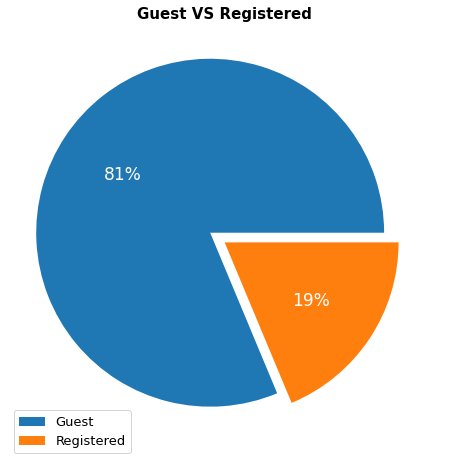

In [9]:
plt.figure(figsize = (12, 8))
plt.title('Guest VS Registered', size = 15, fontweight = 'bold')

labels = 'Guest', 'Registered'

plt.pie(df['user_type'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)
plt.show()

In [10]:
df['user_type'].value_counts()

Registered    12306
Guest          2832
Name: user_type, dtype: int64

In [11]:
# Split categorical & numerical

df_cat = df.select_dtypes(['object'])
df_con = df.select_dtypes(['int64', 'float64'])

### NUMERICAL FEATURES

In [12]:
df_con.head()

,age_when_register,price,total_ticket_sold
0,17.0,50000,3
1,21.0,35000,2
2,25.0,50000,3
3,56.0,35000,3
4,48.0,50000,2


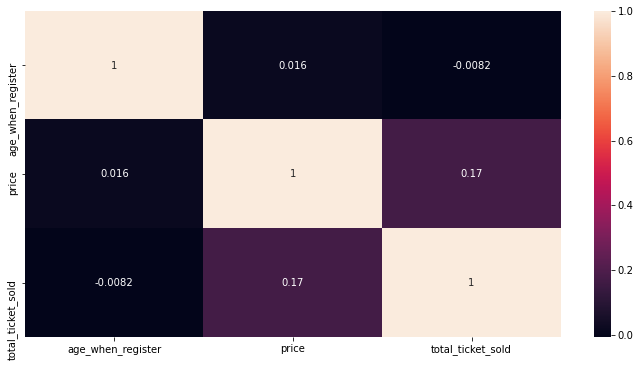

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(df_con.corr(), annot=True)
plt.show()

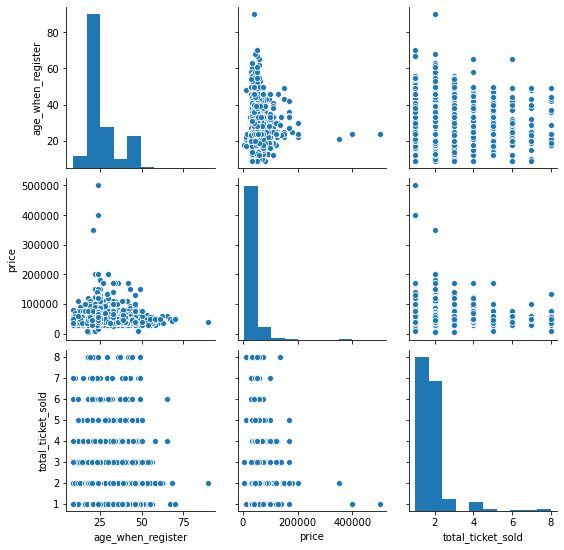

In [14]:
sns.pairplot(df_con)

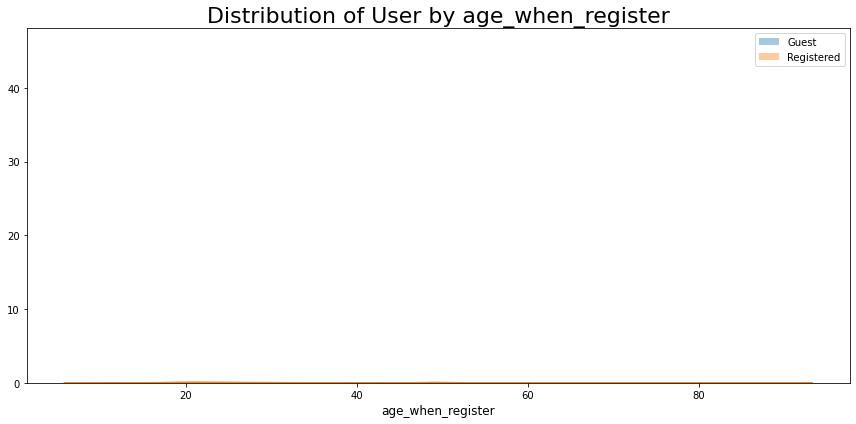

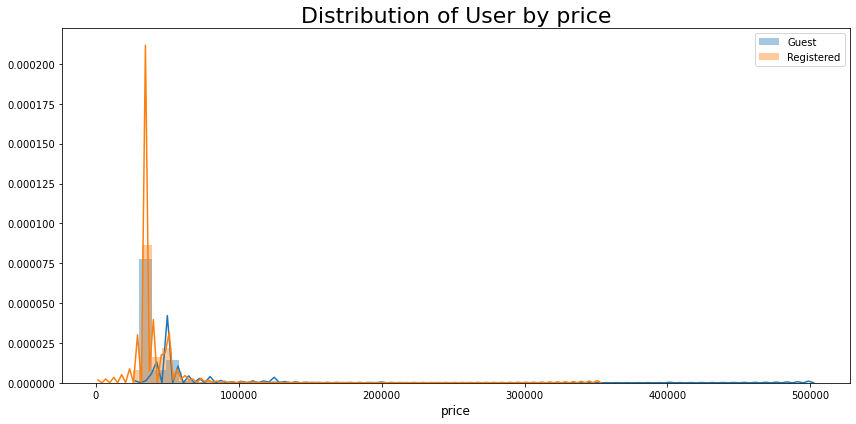

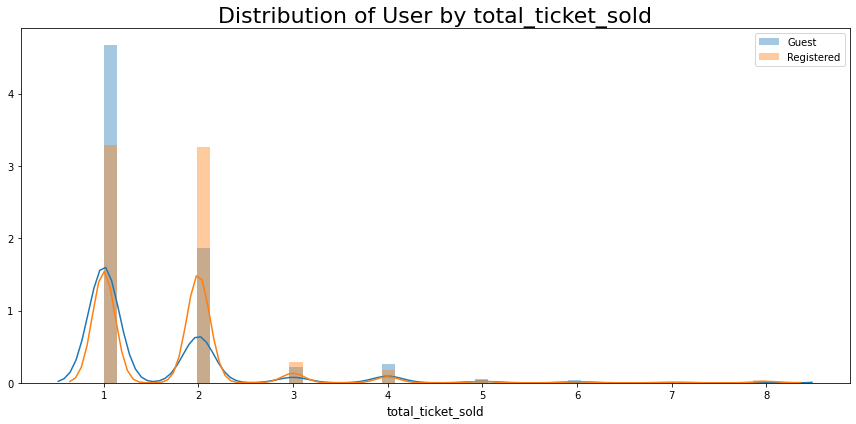

In [21]:
for i in df_con :
    plt.figure(figsize = (12,6))
    ax = sns.distplot(df[(df['user_type'] == 'Guest')][i])
    ax = sns.distplot(df[(df['user_type'] == 'Registered')][i])
    
    ax.legend(['Guest', 'Registered'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of User by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

In [16]:
guest_con = df_con[df['user_type']=='Guest']
regist_con = df_con[df['user_type']=='Registered']

In [17]:
guest_con['age_when_register'].value_counts().head()

24.0    2592
25.0     240
Name: age_when_register, dtype: int64

In [18]:
regist_con['age_when_register'].value_counts().head()

49.0    1696
21.0    1365
22.0     914
20.0     863
24.0     735
Name: age_when_register, dtype: int64

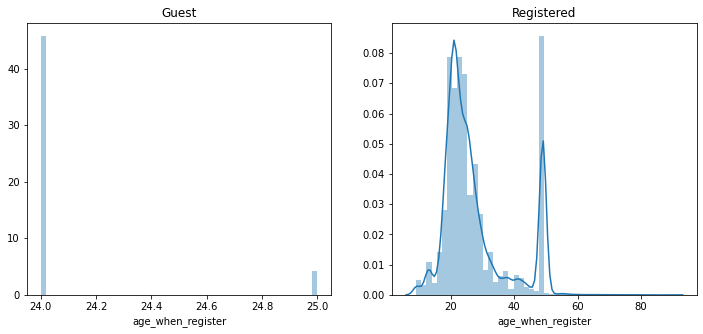

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.distplot(guest_con['age_when_register'], ax=ax1)
sns.distplot(regist_con['age_when_register'], ax=ax2)
ax1.set_title('Guest'), ax2.set_title('Registered')
plt.show()

In [22]:
guest_con['price'].value_counts().head()

35000    2022
50000     300
40000     116
55000      52
30000      40
Name: price, dtype: int64

In [23]:
regist_con['price'].value_counts().head()

35000    7320
50000    1650
40000     868
30000     679
45000     363
Name: price, dtype: int64

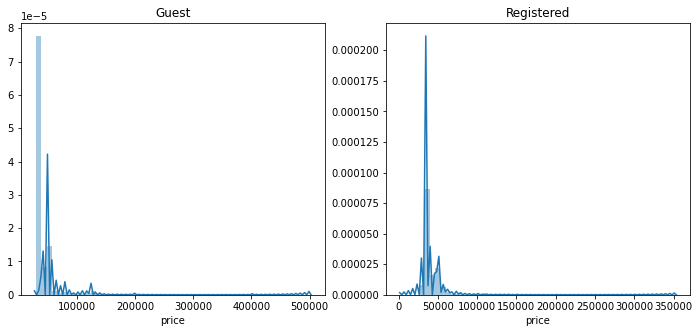

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.distplot(guest_con['price'], ax=ax1)
sns.distplot(regist_con['price'], ax=ax2)
ax1.set_title('Guest'), ax2.set_title('Registered')
plt.show()

In [25]:
guest_con['total_ticket_sold'].value_counts().head()

1    1851
2     740
4     105
3      87
5      22
Name: total_ticket_sold, dtype: int64

In [26]:
regist_con['total_ticket_sold'].value_counts().head()

1    5673
2    5615
3     489
4     312
8      71
Name: total_ticket_sold, dtype: int64

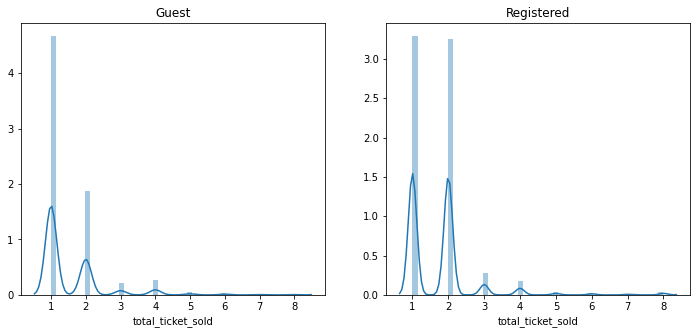

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.distplot(guest_con['total_ticket_sold'], ax=ax1)
sns.distplot(regist_con['total_ticket_sold'], ax=ax2)
ax1.set_title('Guest'), ax2.set_title('Registered')
plt.show()

### CATEGORICAL FEATURES

In [29]:
df_cat.head(3)

,user_id,event_id,event_type,organization_type,event_category,user_type,user_location,gender
0,50bd7b56b494e843cf8cc86deba1746b5dcb3622871c3c...,3757175fd0193ff5f0610a51c0c66bc2f23a027c76b0f7...,Movie,Cinemas,Movies or Cinemas,Registered,Bandung,female
1,5ab517007fc2fa2256ccb5179cf2f85fb6333c0b97e78f...,ce3ef49344353815e0e6bb9be1e94cae9e3dcf19e21931...,Movie,Cinemas,Movies or Cinemas,Registered,Depok,female
2,b9c12d8ea302adcf5c1583367702dfeff02c00bb3a247b...,b8e87ba403345ef34659cfce029a68f73ec6f89eee59e2...,Movie,Cinemas,Movies or Cinemas,Registered,Jakarta,male


In [31]:
cat_corr = df_cat.drop(columns = ['user_id', 'event_id', 'event_type'])

In [32]:
cat_corr

,organization_type,event_category,user_type,user_location,gender
0,Cinemas,Movies or Cinemas,Registered,Bandung,female
1,Cinemas,Movies or Cinemas,Registered,Depok,female
2,Cinemas,Movies or Cinemas,Registered,Jakarta,male
3,Cinemas,Movies or Cinemas,Registered,Tangerang,female
4,Cinemas,Movies or Cinemas,Registered,Bandung,female
...,...,...,...,...,...
15133,Cinemas,Movies or Cinemas,Registered,Jakarta,female
15134,Cinemas,Movies or Cinemas,Registered,Unknown,female
15135,Cinemas,Movies or Cinemas,Registered,Unknown,female
15136,Cinemas,Movies or Cinemas,Registered,Unknown,male


In [33]:
# cramers for categorical feature correlation

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [34]:
corr = []
for i in cat_corr:
    matrix = []
    for j in cat_corr:
        matrix.append(cramersv(cat_corr[i], cat_corr[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = cat_corr.columns, columns = cat_corr.columns)

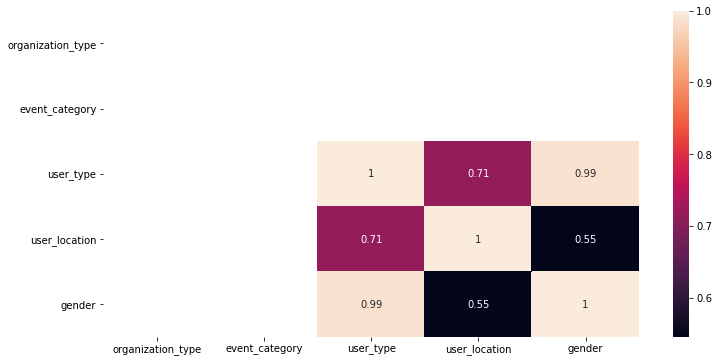

In [35]:
plt.figure(figsize = (12,6))
sns.heatmap(corr_cat, annot = True)
plt.show()

> There are several features that highly correlated. We will explore it one by one.

In [37]:
pd.crosstab(df['user_type'], df['gender'], normalize = True)

gender,female,male,none
user_type,,,
Guest,0.000198,0.000000,0.186881
Registered,0.434205,0.375611,0.003105


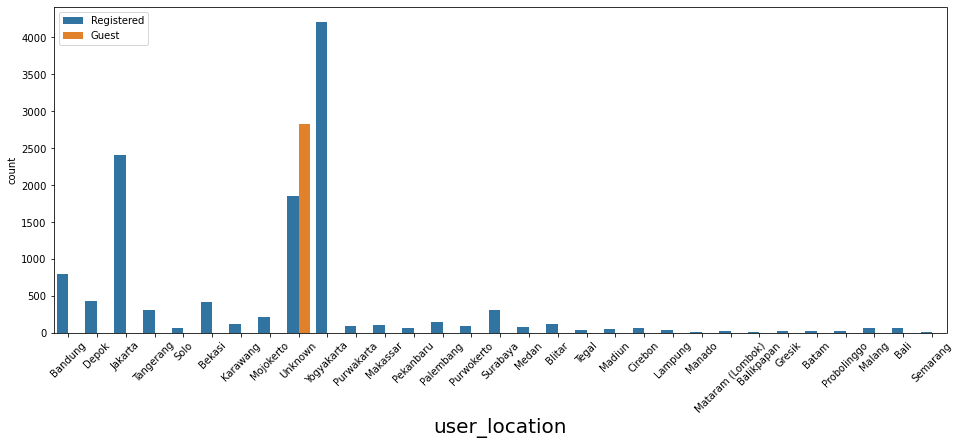

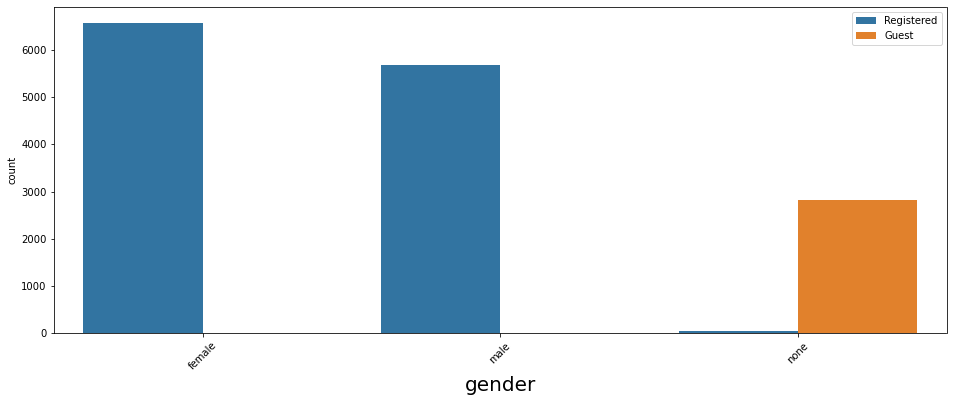

In [42]:
for i in cat_corr.drop(columns = ['event_category', 'user_type', 'organization_type']):
    plt.figure(figsize = (16,6))
    ax = sns.countplot(x = i, data = cat_corr, hue = 'user_type')
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=45)
    ax.legend(['Registered', 'Guest'])
    plt.tight_layout
    plt.show()

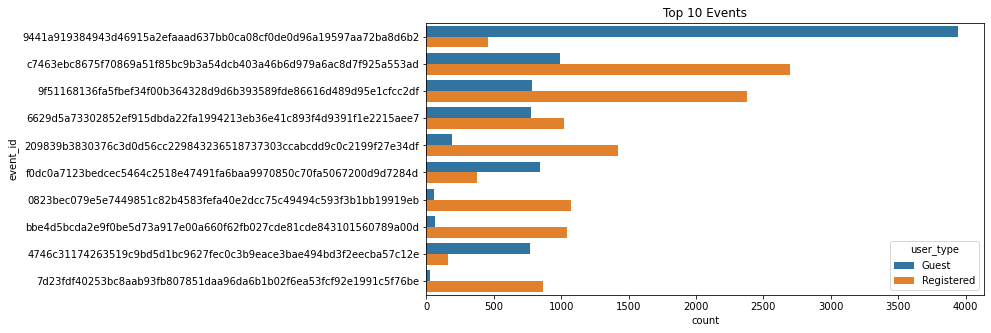

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'event_id', hue = 'user_type', data = df_cat, order = df_cat['event_id'].value_counts().head(10).index)
plt.title('Top 10 Events')
plt.show()

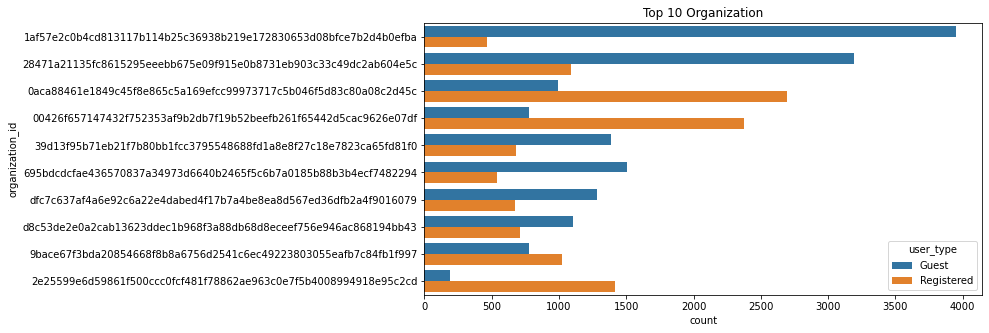

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'organization_id', hue = 'user_type', data = df_cat, order = df_cat['organization_id'].value_counts().head(10).index)
plt.title('Top 10 Organization')
plt.show()

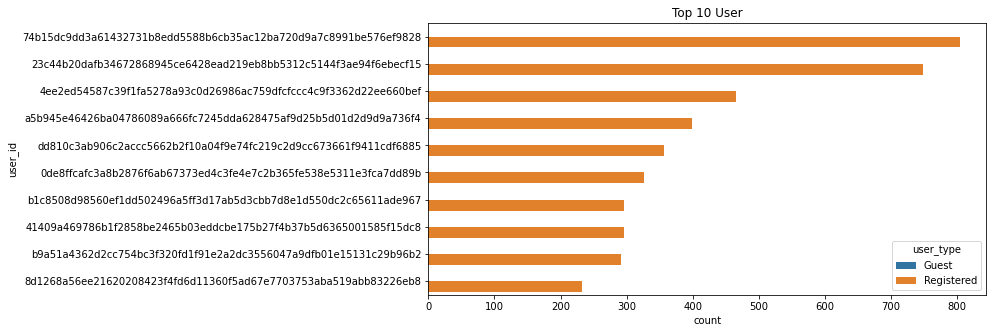

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'user_id', hue = 'user_type', data = df_cat, order = df_cat['user_id'].value_counts().head(10).index)
plt.title('Top 10 User')
plt.show()